# Running with updated fiber comb parameters from Yu.

The parameters are 200MHz rep-rate, and 1.7 Watts

As a note, to get 1 microwatt per comb tooth, we can, for example, use a 100GHz passband to calculate what power would be needed in that window:

$
100\text{GHz}\big /200\text{MHz} = .5 \times 10^3 = 500 \text{ comb teeth} \\ 
500\text{ teeth} \times 1\mu W = .5 mW
$

I think that getting that power should not be an issue, even if using PM1550

Set up simulation functions

In [1]:
import sys
sys.path.append("../")
from simulationHeader import *

def get_window(center_wavelength_nm, window_ghz):
    nu = sc.c / (center_wavelength_nm * 1e-9)
    window_hz = window_ghz * 1e9
    nu_up = nu + (window_hz / 2)
    nu_down = nu - (window_hz / 2)

    return (sc.c / nu_up) * 1e6, (sc.c / nu_down) * 1e6

### Simulate propagation in PM1550

In [3]:
pulse = get_pulse_data(plot=False, frep_MHz=200.0, EPP_nJ=17.0,
                       using_notebook=True)[1]

Text(0, 0.5, 'degrees')

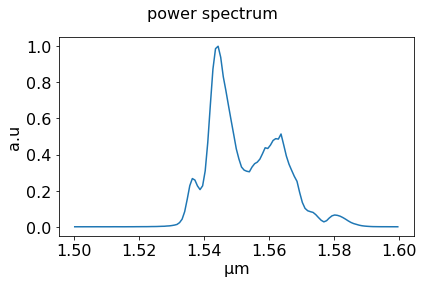

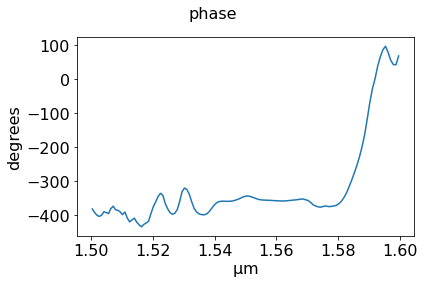

In [21]:
# plot the pulse
fig, ax = plt.subplots(1, 1)
ind = np.logical_and(pulse.wl_um >= 1.5, pulse.wl_um <= 1.6)
ax.plot(pulse.wl_um[ind], normalize(abs(pulse.AW[ind]) ** 2))
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u")
fig.suptitle("power spectrum")

phase = np.unwrap(np.arctan2(pulse.AW[ind].imag, pulse.AW[ind].real))
phase *= 180 / np.pi
fig, ax = plt.subplots(1, 1)
fig.suptitle("phase")
ax.plot(pulse.wl_um[ind], phase)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("degrees")

In [2]:
sim_pm1550 = simulate(pulse=pulse, fiber=fiber_pm1550, length_cm=10., epp_nJ=17,
               nsteps=200)


Pulse energy before Simple Fiber : 17.0 nJ
pulse energy in  197017.97097845754
copied as   197017.97097845754
Step: 1 Distance remaining: 0.0995
Pulse energy after: 16.94454558668626 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 16.944216404091794 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 16.943882021772417 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 16.943542341959745 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 16.9431972621362 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 16.94284667481025 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 16.942490467280763 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 16.942128521389773 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 16.941760713262074 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 16.941386913037462 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 16.94100698457672 nJ
Step: 12 Distance remaining: 0.094
Pulse energy aft

Pulse energy after: 16.873525784587894 nJ
Step: 102 Distance remaining: 0.049
Pulse energy after: 16.873043251931477 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 16.87218279081841 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 16.870869340386605 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 16.869033275679733 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 16.866615263414523 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 16.86357180800391 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 16.859881047812237 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 16.855547979964815 nJ
Step: 110 Distance remaining: 0.045
Pulse energy after: 16.850607928061656 nJ
Step: 111 Distance remaining: 0.0445
Pulse energy after: 16.84511878238141 nJ
Step: 112 Distance remaining: 0.044
Pulse energy after: 16.839169168218106 nJ
Step: 113 Distance remaining: 0.04350000000000001
Pulse energy after: 16.832865736463727 nJ
Step: 

Pulse energy after Simple Fiber : 16.445538240976614 nJ


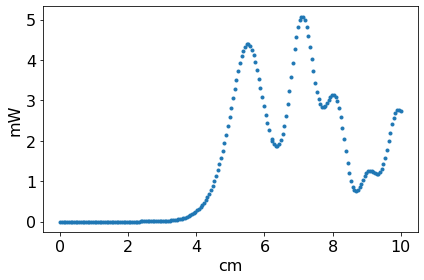

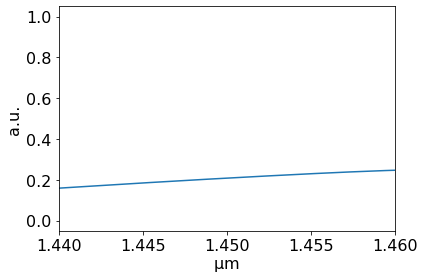

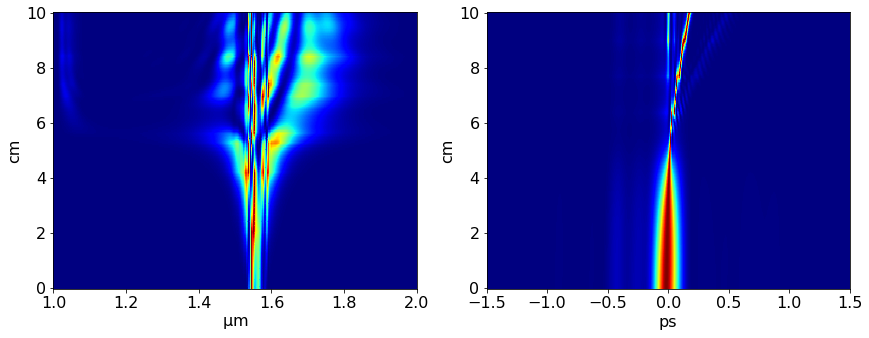

In [3]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_pm1550.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_pm1550.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_pm1550.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_pm1550, ax1)
plot_time_evolv(sim_pm1550, ax2)


Evidently, PM1550 can be used to some extent (5 mW predicted)

### Simulate the propagation in ND-HNLF

In [4]:
sim_ndhnlf = simulate(pulse=pulse, fiber=fiber_ndhnlf, length_cm=10., epp_nJ=17,
               nsteps=200)


Pulse energy before Simple Fiber : 17.0 nJ
pulse energy in  197017.97097845754
copied as   197017.97097845754
Step: 1 Distance remaining: 0.0995
Pulse energy after: 16.941532086677974 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 16.938223662252536 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 16.934945264399058 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 16.931697582388573 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 16.928481149604437 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 16.925296508136633 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 16.922144740831506 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 16.91902897563159 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 16.915958632134036 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 16.912918528848785 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 16.9099080983296 nJ
Step: 12 Distance remaining: 0.094
Pulse energy a

Pulse energy after: 16.715561667118433 nJ
Step: 100 Distance remaining: 0.05
Pulse energy after: 16.714453506200954 nJ
Step: 101 Distance remaining: 0.0495
Pulse energy after: 16.71349276067853 nJ
Step: 102 Distance remaining: 0.049
Pulse energy after: 16.71267209993085 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 16.711974438568927 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 16.7113733963131 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 16.710834954968718 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 16.710320110612244 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 16.70978811290744 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 16.709199794524363 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 16.708520564063427 nJ
Step: 110 Distance remaining: 0.045
Pulse energy after: 16.707714750737317 nJ
Step: 111 Distance remaining: 0.0445
Pulse energy after: 16.706767363065538 nJ
Step: 112 Distance rem

Pulse energy after: 16.50550088637664 nJ
Step: 194 Distance remaining: 0.0030000000000000027
Pulse energy after: 16.50252571595265 nJ
Step: 195 Distance remaining: 0.0025000000000000022
Pulse energy after: 16.499573047847242 nJ
Step: 196 Distance remaining: 0.0020000000000000018
Pulse energy after: 16.496626594501898 nJ
Step: 197 Distance remaining: 0.0015000000000000013
Pulse energy after: 16.493680319085858 nJ
Step: 198 Distance remaining: 0.0010000000000000009
Pulse energy after: 16.49076937054457 nJ
Step: 199 Distance remaining: 0.0005000000000000004
Pulse energy after: 16.48790553710521 nJ
Pulse energy after Simple Fiber : 16.50019313081097 nJ


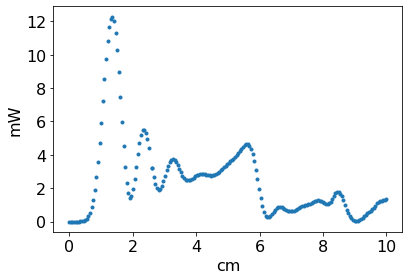

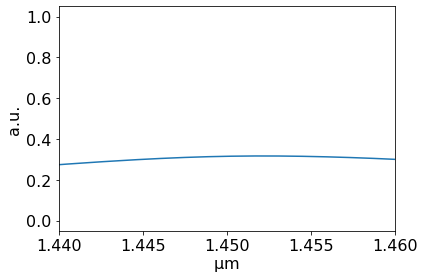

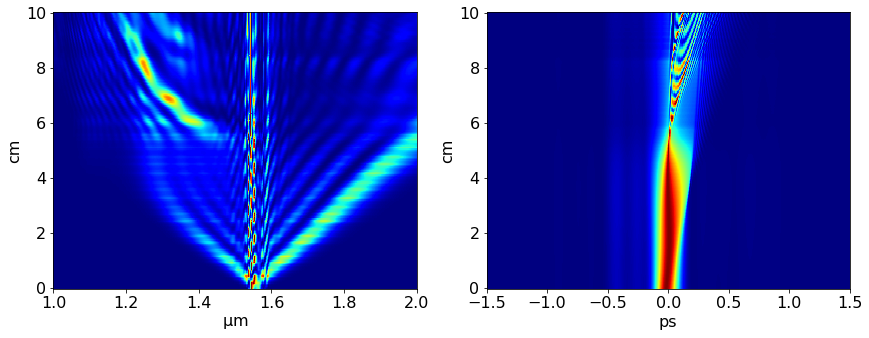

In [5]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_ndhnlf.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_ndhnlf.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_ndhnlf.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_ndhnlf, ax1)
plot_time_evolv(sim_ndhnlf, ax2)


We can get a lot more power using NDHNLF (12 mW instead of 5 mW). However, we also can hardly use any fiber (at least to be optimal).

### Simulate propagation in AD-HNLF

In [6]:
sim_adhnlf = simulate(pulse=pulse, fiber=fiber_adhnlf, length_cm=10., epp_nJ=17,
               nsteps=200)

Pulse energy before Simple Fiber : 17.0 nJ
pulse energy in  197017.97097845754
copied as   197017.97097845754
Step: 1 Distance remaining: 0.0995
Pulse energy after: 16.941387489016474 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 16.93790703553125 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 16.934425867379726 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 16.93094160590051 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 16.927451943209178 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 16.923954881587182 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 16.92044954517058 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 16.91693845815937 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 16.91341191377167 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 16.909867324931096 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 16.906302059864178 nJ
Step: 12 Distance remaining: 0.094
Pulse energy aft

Pulse energy after: 16.21931582633795 nJ
Step: 98 Distance remaining: 0.051000000000000004
Pulse energy after: 16.21020861465145 nJ
Step: 99 Distance remaining: 0.0505
Pulse energy after: 16.20043050589389 nJ
Step: 100 Distance remaining: 0.05
Pulse energy after: 16.191912634101424 nJ
Step: 101 Distance remaining: 0.0495
Pulse energy after: 16.182153924587233 nJ
Step: 102 Distance remaining: 0.049
Pulse energy after: 16.174014958845124 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 16.16528909763169 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 16.156644480383594 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 16.14799710101318 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 16.13936940434365 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 16.130715672284257 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 16.121997624738086 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 16.113641036585243 nJ
Step: 110 

Pulse energy after: 15.675248069980528 nJ
Step: 192 Distance remaining: 0.0040000000000000036
Pulse energy after: 15.6713590787769 nJ
Step: 193 Distance remaining: 0.003500000000000003
Pulse energy after: 15.666629105434923 nJ
Step: 194 Distance remaining: 0.0030000000000000027
Pulse energy after: 15.662779502580777 nJ
Step: 195 Distance remaining: 0.0025000000000000022
Pulse energy after: 15.657763103090293 nJ
Step: 196 Distance remaining: 0.0020000000000000018
Pulse energy after: 15.653635803568134 nJ
Step: 197 Distance remaining: 0.0015000000000000013
Pulse energy after: 15.648415050531248 nJ
Step: 198 Distance remaining: 0.0010000000000000009
Pulse energy after: 15.644617905698498 nJ
Step: 199 Distance remaining: 0.0005000000000000004
Pulse energy after: 15.640076783473878 nJ
Pulse energy after Simple Fiber : 15.642617141052936 nJ


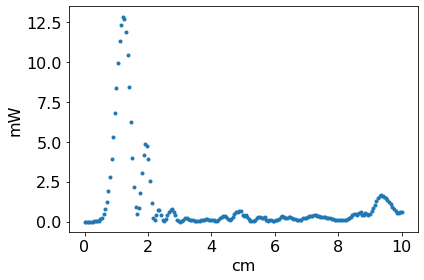

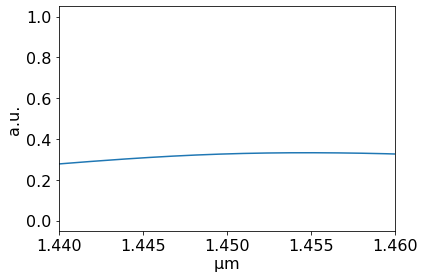

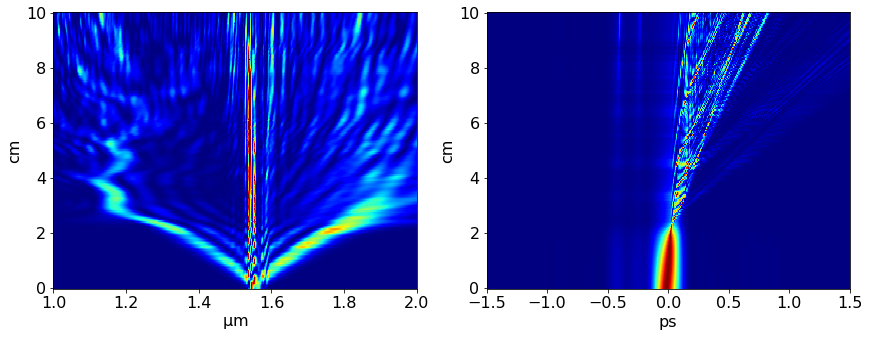

In [7]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_adhnlf.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_adhnlf.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_adhnlf.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_adhnlf, ax1)
plot_time_evolv(sim_adhnlf, ax2)


We can get a little more power with the anlomalous dispersion, but not much more (around .5 mW more than the normal dispersion. Furthermore, the optimal length here would not be something that we could work with. 

To connectorize, it would be good to have at least 7 centimeters. We can actually try broadening in PM-1550. It gives the specs that we need, although we can expect better if using HNLF. However, the fiber length may be easier to work with, although it is still a little short (6 instead of 7 cm). 

The other possibility is to just cut down the power before coupling into fiber. This would be needed later for some tunablity anyways.

## Simulate with 1 W instead lf 1.7 W:

### Simulate propagation in ND-HNLF but with 1W instead of 1.7W input.

In [8]:
sim_ndhnlf_lower_power = simulate(pulse=pulse, fiber=fiber_ndhnlf, length_cm=10., epp_nJ=10,
               nsteps=200)

Pulse energy before Simple Fiber : 10.000000000000002 nJ
pulse energy in  151105.8859142243
copied as   151105.8859142243
Step: 1 Distance remaining: 0.0995
Pulse energy after: 9.966416042261972 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 9.96526874822137 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 9.964128715591121 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 9.962996125659055 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 9.961871135556404 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 9.960753877224974 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 9.959644457237566 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 9.958542969794914 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 9.957449532906155 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 9.956364150788016 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 9.955286793230336 nJ
Step: 12 Distance remaining: 0.094
Pulse energ

Pulse energy after: 9.882212425202248 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 9.881599852025087 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 9.880989869795636 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 9.88038247218091 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 9.87977765296775 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 9.879175405014507 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 9.878575719123164 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 9.877978582846547 nJ
Step: 110 Distance remaining: 0.045
Pulse energy after: 9.877383979245852 nJ
Step: 111 Distance remaining: 0.0445
Pulse energy after: 9.876791885613272 nJ
Step: 112 Distance remaining: 0.044
Pulse energy after: 9.8762022721731 nJ
Step: 113 Distance remaining: 0.04350000000000001
Pulse energy after: 9.875615100772105 nJ
Step: 114 Distance remaining: 0.04300000000000001
Pulse energy after: 9.875030323566117 nJ
Step: 

Pulse energy after: 9.825605068256282 nJ
Step: 199 Distance remaining: 0.0005000000000000004
Pulse energy after: 9.824093680878502 nJ
Pulse energy after Simple Fiber : 9.830028913735815 nJ


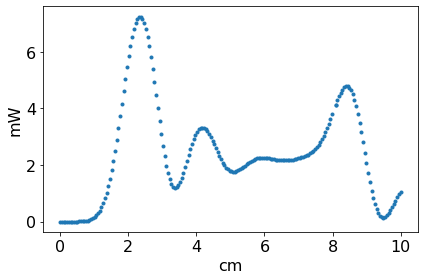

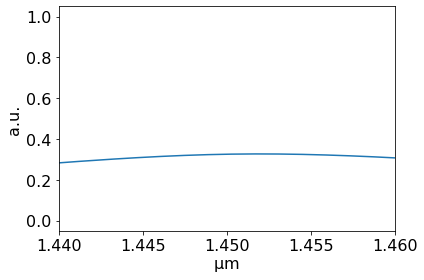

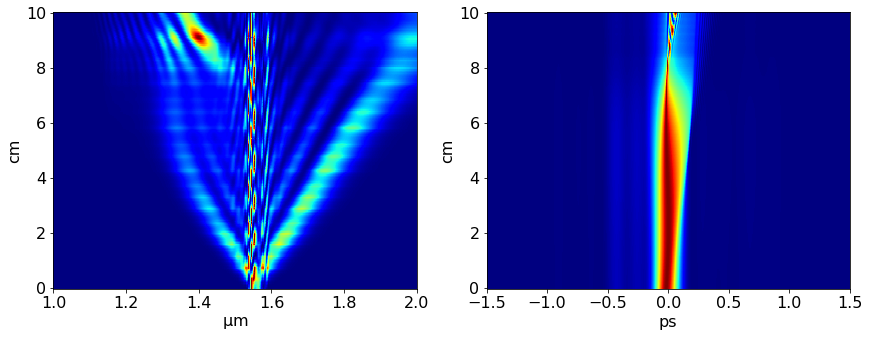

In [9]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_ndhnlf_lower_power.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_ndhnlf_lower_power.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_ndhnlf_lower_power.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_ndhnlf_lower_power, ax1)
plot_time_evolv(sim_ndhnlf_lower_power, ax2)


### Simulate propagation in PM1550 but with 1W instead of 1.7W power

In [10]:
sim_pm1550_lower_power = simulate(pulse=pulse, fiber=fiber_pm1550, length_cm=10., epp_nJ=10,
               nsteps=200)

Pulse energy before Simple Fiber : 10.000000000000002 nJ
pulse energy in  151105.8859142243
copied as   151105.8859142243
Step: 1 Distance remaining: 0.0995
Pulse energy after: 9.967457888597332 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 9.967343649365002 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 9.967227650908505 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 9.96710987113937 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 9.966990287122115 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 9.966868875044067 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 9.966745610184436 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 9.966620466882642 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 9.966493418505786 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 9.966364437415391 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 9.966233494932945 nJ
Step: 12 Distance remaining: 0.094
Pulse energ

Pulse energy after: 9.940320888040299 nJ
Step: 99 Distance remaining: 0.0505
Pulse energy after: 9.939798931198439 nJ
Step: 100 Distance remaining: 0.05
Pulse energy after: 9.939278685489738 nJ
Step: 101 Distance remaining: 0.0495
Pulse energy after: 9.938761327097207 nJ
Step: 102 Distance remaining: 0.049
Pulse energy after: 9.938248120930613 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 9.937740420320967 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 9.93723966554276 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 9.936747380973797 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 9.936265170691328 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 9.935794712294474 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 9.935337748737512 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 9.934896077957294 nJ
Step: 110 Distance remaining: 0.045
Pulse energy after: 9.93447154008204 nJ
Step: 111 Distance remaining: 0.0

Pulse energy after: 9.823313643253993 nJ
Step: 194 Distance remaining: 0.0030000000000000027
Pulse energy after: 9.821810470532531 nJ
Step: 195 Distance remaining: 0.0025000000000000022
Pulse energy after: 9.820287251940368 nJ
Step: 196 Distance remaining: 0.0020000000000000018
Pulse energy after: 9.818735110004768 nJ
Step: 197 Distance remaining: 0.0015000000000000013
Pulse energy after: 9.817145683798456 nJ
Step: 198 Distance remaining: 0.0010000000000000009
Pulse energy after: 9.815511200721364 nJ
Step: 199 Distance remaining: 0.0005000000000000004
Pulse energy after: 9.813824541511977 nJ
Pulse energy after Simple Fiber : 9.827658456169956 nJ


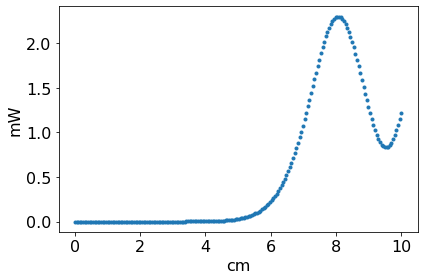

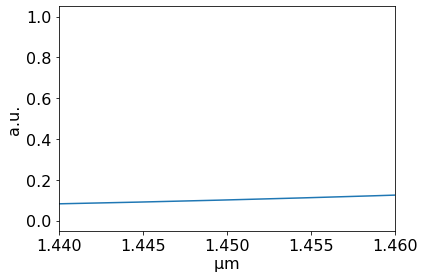

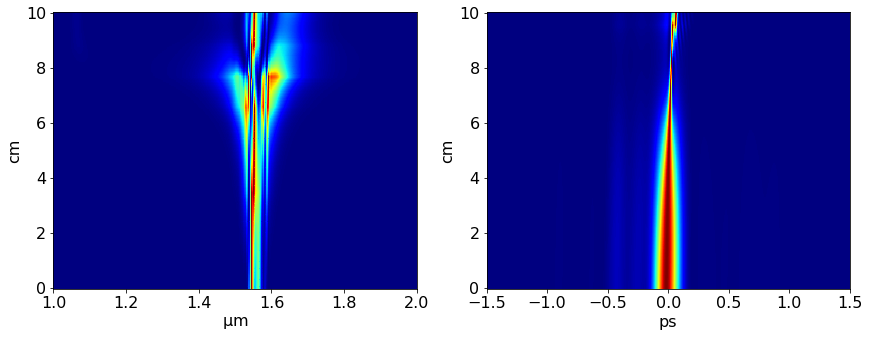

In [11]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_pm1550_lower_power.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_pm1550_lower_power.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_pm1550_lower_power.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_pm1550_lower_power, ax1)
plot_time_evolv(sim_pm1550_lower_power, ax2)


### Simulate propagation in AD-HNLF but with 1W instead of 1.7W power

In [12]:
sim_adhnlf_lower_power = simulate(pulse=pulse, fiber=fiber_adhnlf, length_cm=10., epp_nJ=10,
               nsteps=200)

Pulse energy before Simple Fiber : 10.000000000000002 nJ
pulse energy in  151105.8859142243
copied as   151105.8859142243
Step: 1 Distance remaining: 0.0995
Pulse energy after: 9.966365003308702 nJ
Step: 2 Distance remaining: 0.099
Pulse energy after: 9.965157442315657 nJ
Step: 3 Distance remaining: 0.0985
Pulse energy after: 9.963947204601615 nJ
Step: 4 Distance remaining: 0.098
Pulse energy after: 9.96273378304309 nJ
Step: 5 Distance remaining: 0.0975
Pulse energy after: 9.96151666762854 nJ
Step: 6 Distance remaining: 0.097
Pulse energy after: 9.96029534327355 nJ
Step: 7 Distance remaining: 0.0965
Pulse energy after: 9.959069289271103 nJ
Step: 8 Distance remaining: 0.096
Pulse energy after: 9.957837997172913 nJ
Step: 9 Distance remaining: 0.0955
Pulse energy after: 9.956601026388233 nJ
Step: 10 Distance remaining: 0.095
Pulse energy after: 9.955357770981413 nJ
Step: 11 Distance remaining: 0.0945
Pulse energy after: 9.954107592403766 nJ
Step: 12 Distance remaining: 0.094
Pulse energy 

Pulse energy after: 9.690052765566996 nJ
Step: 100 Distance remaining: 0.05
Pulse energy after: 9.686194293235857 nJ
Step: 101 Distance remaining: 0.0495
Pulse energy after: 9.682297624707276 nJ
Step: 102 Distance remaining: 0.049
Pulse energy after: 9.678375859922006 nJ
Step: 103 Distance remaining: 0.0485
Pulse energy after: 9.67364451744871 nJ
Step: 104 Distance remaining: 0.048
Pulse energy after: 9.67011642549603 nJ
Step: 105 Distance remaining: 0.0475
Pulse energy after: 9.66537895435917 nJ
Step: 106 Distance remaining: 0.047
Pulse energy after: 9.661614221483857 nJ
Step: 107 Distance remaining: 0.0465
Pulse energy after: 9.65658209449463 nJ
Step: 108 Distance remaining: 0.046
Pulse energy after: 9.652416384917645 nJ
Step: 109 Distance remaining: 0.0455
Pulse energy after: 9.647804185256069 nJ
Step: 110 Distance remaining: 0.045
Pulse energy after: 9.642960546122149 nJ
Step: 111 Distance remaining: 0.0445
Pulse energy after: 9.638197269977761 nJ
Step: 112 Distance remaining: 0.04

Pulse energy after: 9.374188970227538 nJ
Step: 195 Distance remaining: 0.0025000000000000022
Pulse energy after: 9.371749644081607 nJ
Step: 196 Distance remaining: 0.0020000000000000018
Pulse energy after: 9.369321956600757 nJ
Step: 197 Distance remaining: 0.0015000000000000013
Pulse energy after: 9.366919885896278 nJ
Step: 198 Distance remaining: 0.0010000000000000009
Pulse energy after: 9.364543164338722 nJ
Step: 199 Distance remaining: 0.0005000000000000004
Pulse energy after: 9.362192207094644 nJ
Pulse energy after Simple Fiber : 9.364983847580572 nJ


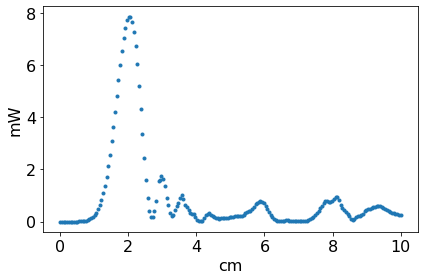

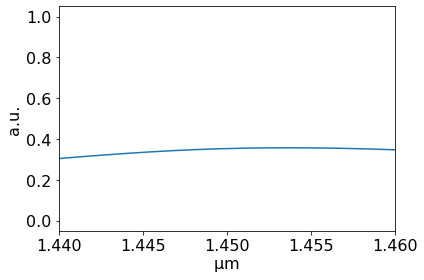

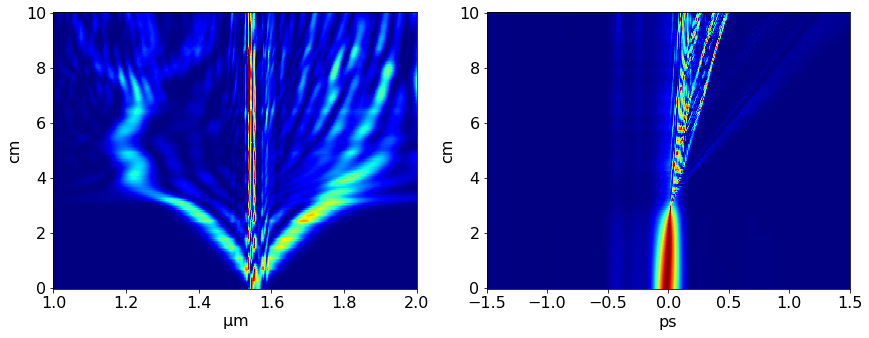

In [13]:
# suppose you use a 100 GHz pass band around 1.45 micron
ll_um, ul_um = get_window(center_wavelength_nm=1450., window_ghz=100.)

# plot the power evolution around 1.45 micron, with a 100 GHz passband
power = fpn.power_in_window(pulse, sim_adhnlf_lower_power.AW, ll_um, ul_um, 200) * 1e3
fig, ax = plt.subplots(1, 1)
ax.plot((sim_adhnlf_lower_power.zs * 1e2), power, '.')
ax.set_xlabel("cm")
ax.set_ylabel("mW")

# plot the spectrum at the "best" point
best_ind = np.argmax(power)
AW_best = sim_adhnlf_lower_power.AW[best_ind]
ind = (pulse.wl_um > 0).nonzero()
fig, ax = plt.subplots(1, 1)
ax.plot(pulse.wl_um[ind], normalize(abs(AW_best[ind]) ** 2))
ax.set_xlim(1.44, 1.46)
ax.set_xlabel("$\mathrm{\mu m}$")
ax.set_ylabel("a.u.")

# 2D plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=[12.18, 4.8])
plot_freq_evolv(sim_adhnlf_lower_power, ax1)
plot_time_evolv(sim_adhnlf_lower_power, ax2)


# Discussion

From the above, I think the best option is to do ND-HNLF with about 1W input power. You're best power will actually be earlier in the fiber, but if you ride it out past 7 cm, you will still have more power than if you broadened in PM1550. And at that point your pulse also has not fissioned yet. I know that the pulse's time domain picture is not important here, but I thought it would still be good to note that. 